### GRIP: The Sparks Foundation

####  Data Science and Business Analytics Intern 

#### TASK 2: Prediction Using Unsupervised Machine Learning 

#### Author : Gaurav Anant Bahalkar

##### In this task we have to predict the optimum numbers of clusters and represent it visually using "Iris" dataset.

In [31]:
# Importing require Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn.metrics as sm

#Importing sklearn

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [27]:
data = pd.read_csv("Iris1.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape

(150, 6)

INFERENCE : The dataset consist of total 150 samples and 4 features. The target variable includes identifying the species class of the flower.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
data.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [11]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
%matplotlib inline
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

<AxesSubplot:xlabel='PetalWidthCm'>

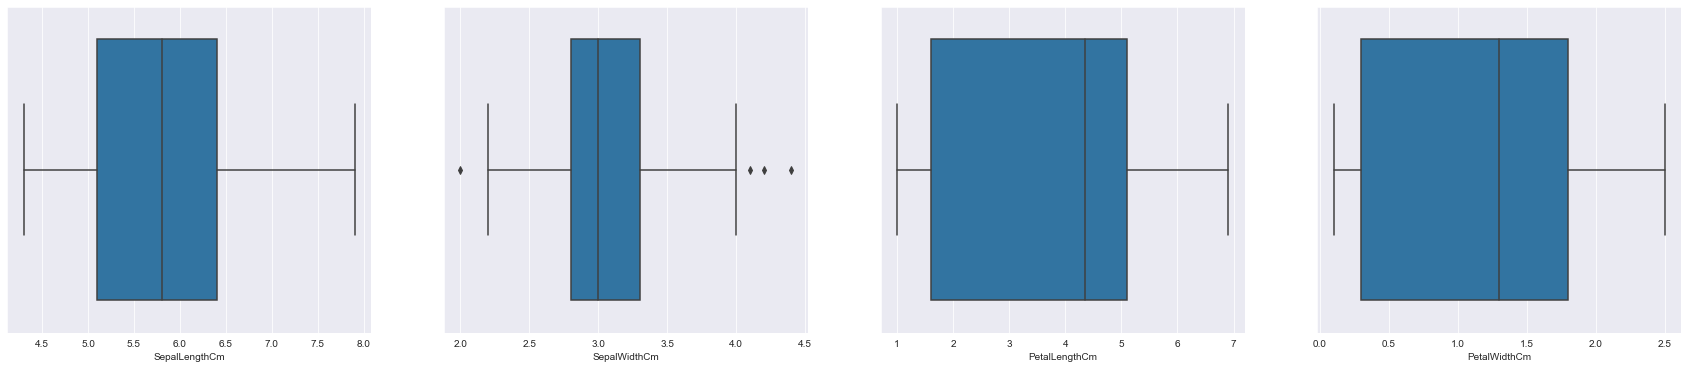

In [17]:
plt.figure(figsize =(30,6))

plt.subplot(1,4,1)
sns.boxplot(data["SepalLengthCm"])
#plt.title("Sepal Length\n")

plt.subplot(1,4,2)
sns.boxplot(data["SepalWidthCm"])
#plt.title("Sepal Width\n")

plt.subplot(1,4,3)
sns.boxplot(data["PetalLengthCm"])
#plt.title("Petal Length\n")

plt.subplot(1,4,4)
sns.boxplot(data["PetalWidthCm"])
#plt.title("Petal Width\n")


In [18]:
cols = data.iloc[:,1:5]
cols.corr(method = "pearson")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


INFERENCE : The dataset does not contain missing values and no outliers as well

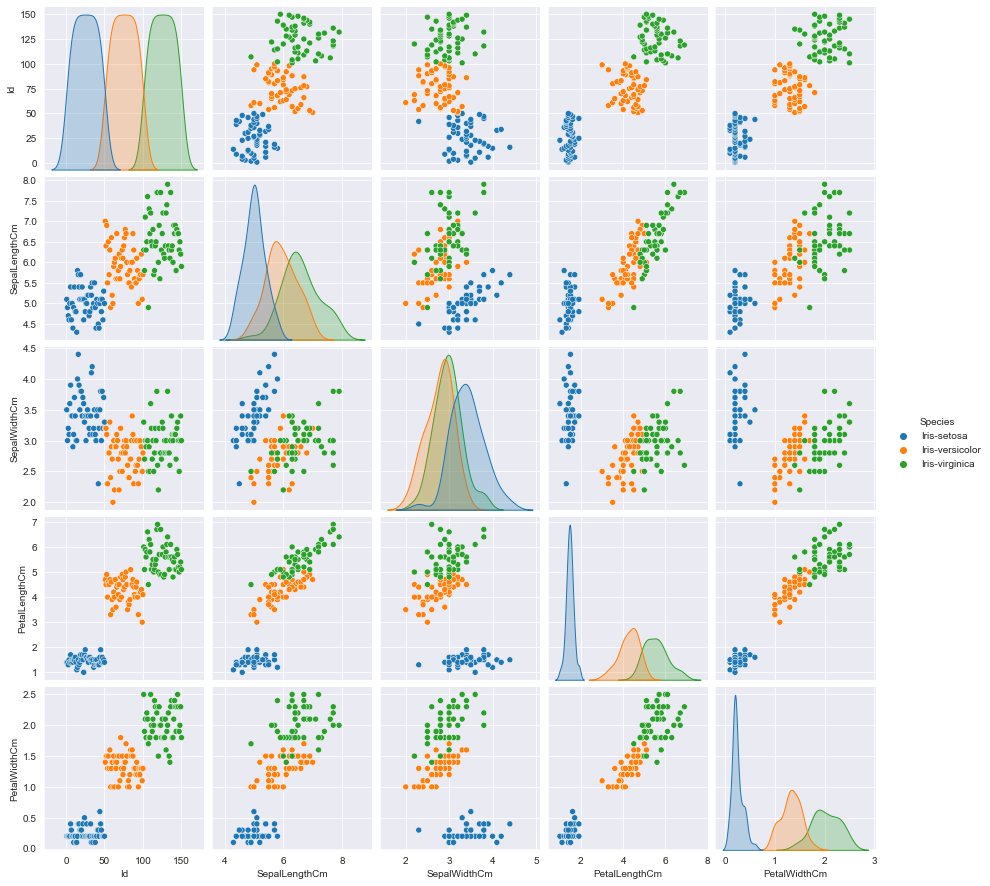

In [20]:
sns.pairplot(data, hue= "Species")

FINDING THE OPTIMAL K VALUES

1.Elbow Method    2.Silhoutte Analysis

In [35]:
data_new = data.drop("Species",1)
data_new.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [32]:
wcss = []
for i in range (1,6):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 50, n_init = 10, random_state = 0)
    kmeans.fit(data_new)
    wcss.append(kmeans.inertia_)

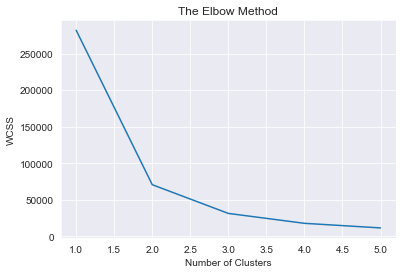

In [34]:
plt.plot(range(1,6),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS") # within cluster sun of squares
plt.show()

In [38]:
## Silhoutte Analysis
range_n_clusters = [3,4,5]

for num_clusters in range_n_clusters:
    # initialise KMeans
    Kmeans = KMeans(n_clusters = num_clusters, max_iter = 50)
    kmeans.fit(data_new)
    
    cluster_labels = kmeans.labels_
    
    #silhoutte score
    silhouette_avg = silhouette_score(data_new,cluster_labels)
    print("For n_clusters = {0}, The Silhoutte Score is {1}".format(num_clusters,silhouette_avg))
    

For n_clusters = 3, The Silhoutte Score is 0.5401654087356104
For n_clusters = 4, The Silhoutte Score is 0.5401654087356104
For n_clusters = 5, The Silhoutte Score is 0.5401654087356104


INFERENCE : For 3 clusters, we can find an optimal clustering of the dataset. This result matches with our visual interpretation and guves agrred upon results.

In [40]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(data_new)

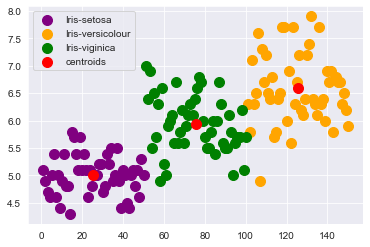

In [41]:
x = data.iloc[:, [0,1,2,3]].values
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0],x[y_kmeans == 0, 1],s = 100, c = "purple", label = "Iris-setosa")
plt.scatter(x[y_kmeans == 1, 0],x[y_kmeans == 1, 1],s = 100, c = "orange", label = "Iris-versicolour")
plt.scatter(x[y_kmeans == 2, 0],x[y_kmeans == 2, 1],s = 100, c = "green", label = "Iris-viginica")

#Plotting the centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c ="red", label = "centroids")
plt.legend()

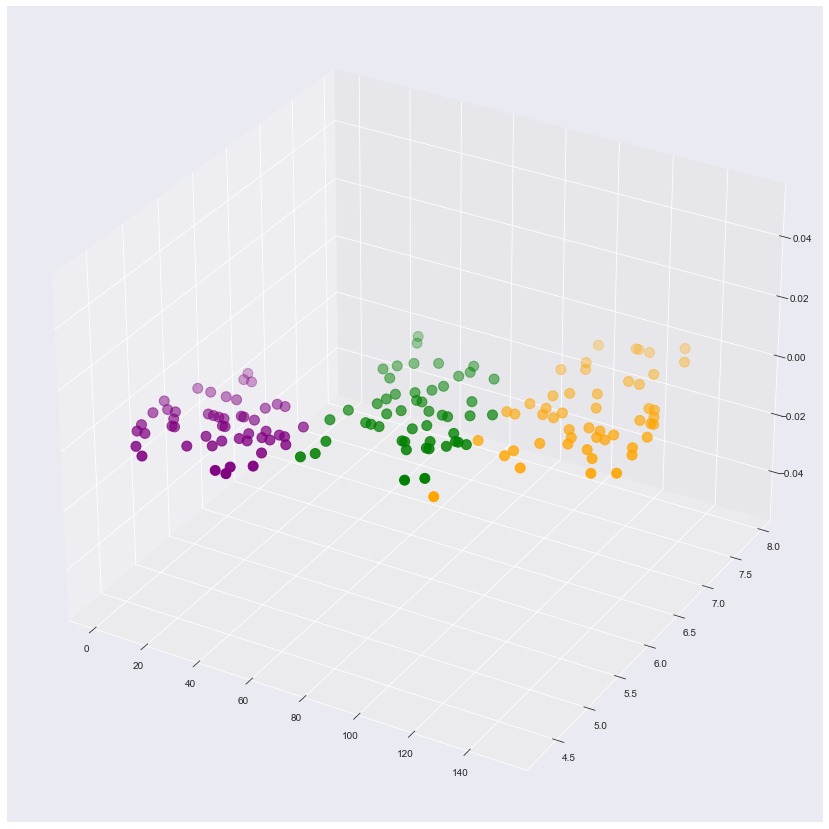

In [42]:
# 3d scatterplot using matplolib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111,projection = "3d")
plt.scatter(x[y_kmeans == 0, 0],x[y_kmeans == 0, 1],s = 100, c = "purple", label = "Iris-setosa")
plt.scatter(x[y_kmeans == 1, 0],x[y_kmeans == 1, 1],s = 100, c = "orange", label = "Iris-versicolour")
plt.scatter(x[y_kmeans == 2, 0],x[y_kmeans == 2, 1],s = 100, c = "green", label = "Iris-viginica")


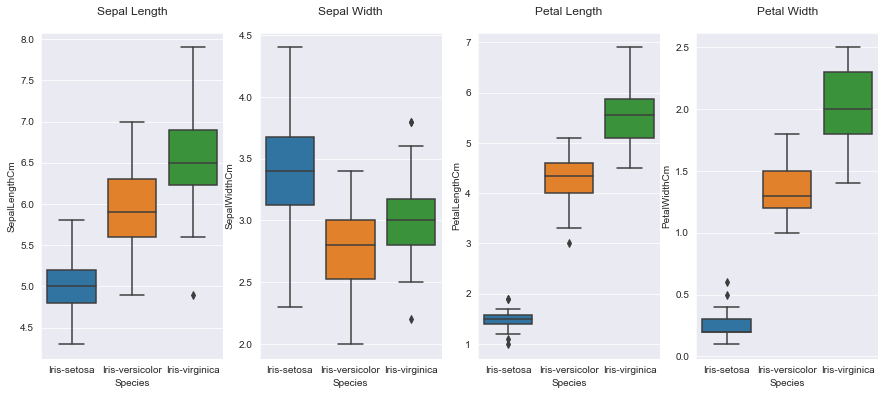

In [44]:
plt.figure(figsize = (15,6))

plt.subplot(1,4,1)
sns.boxplot(y = data["SepalLengthCm"], x = data["Species"])
plt.title("Sepal Length\n")

plt.subplot(1,4,2)
sns.boxplot(y = data["SepalWidthCm"], x = data["Species"])
plt.title("Sepal Width\n")

plt.subplot(1,4,3)
sns.boxplot(y = data["PetalLengthCm"], x = data["Species"])
plt.title("Petal Length\n")

plt.subplot(1,4,4)
sns.boxplot(y = data["PetalWidthCm"], x = data["Species"])
plt.title("Petal Width\n")

plt.show()


INFERENCE : Representation of 3 clusters.
    

CONCLUSION: I could successfully determine that the optimum number of clusters in iris dataset would be. I was able to build an unsupervised model from the dataset.
    
Our analysis is complete.